# 1. Importing dataset and data preprocessing

## 1.1. Importing essential libraries

In [10]:
import numpy as np #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #High-performance, easy-to-use data structures and data analysis tools
import mlcrate as mlc #A collection of handy python tools and functions, mainly for ML and Kaggle
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pal = sns.color_palette()

## 1.2. Importing sample of dataset

In [6]:
# Becouse the training and test datasets contain a total of over 200 million rows, we take a sample of the data.
df_train = pd.read_csv('../input/train.csv', nrows=5000000)
df_test = pd.read_csv('../input/test.csv', nrows=5000000)

## 1.3. Let's summarize datasets

In [7]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [8]:
df_test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


## 1.4. Data fields

* ```ip``` : ip address of click.
* ```app``` : app id for marketing.
* ```device``` : device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* ```os``` : os version id of user mobile phone
* ```channel``` : channel id of mobile ad publisher
* ```click_time``` : timestamp of click (UTC)
* ```attributed_time``` : if user download the app for after clicking an ad, this is the time of the app download
* ```is_attributed``` : the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.
The test data is similar, with the following differences:

* ```click_id``` : reference for making predictions
* ```is_attributed``` : not included

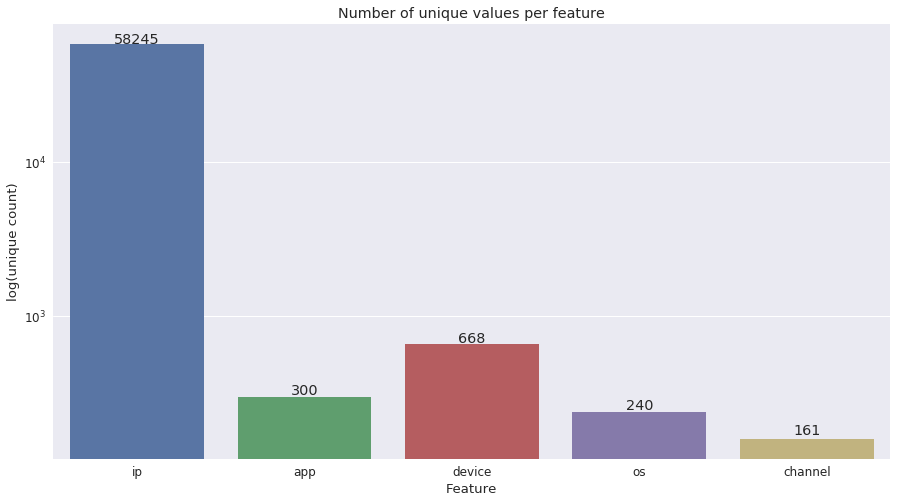

In [11]:
plt.figure(figsize=(15, 8))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(df_train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
# for col, uniq in zip(cols, uniques):
#     ax.text(col, uniq, uniq, color='black', ha="center")

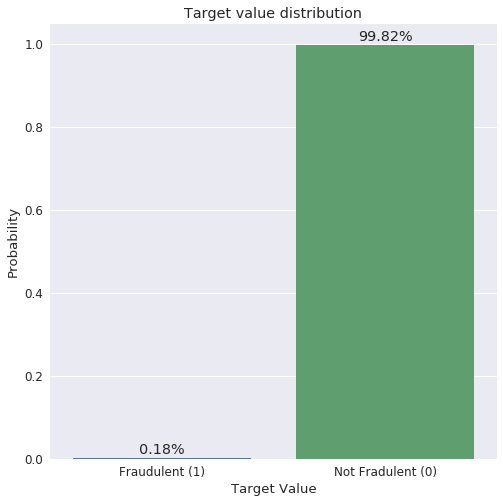

In [12]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
mean = (df_train.is_attributed.values == 1).mean()
ax = sns.barplot(['Fraudulent (1)', 'Not Fradulent (0)'], [mean, 1-mean], palette=pal)
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center") 

In [13]:
(df_train.is_attributed.values == 1).sum()

8954

In [14]:
df_under_1 = df_train[(df_train.is_attributed.values == 1)]

In [15]:
df_under_1.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1


In [16]:
df_under_0 = df_train[(df_train.is_attributed.values == 0)]

In [17]:
df_under_0.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [25]:
df_sample_0 = df_under_0.sample(df_under_1.shape[0])

In [26]:
df_sample_0.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
2688745,64479,18,1,16,121,2017-11-06 17:14:23,NaN,0
4949369,20295,1,1,18,153,2017-11-06 20:20:43,NaN,0
1153777,81776,15,1,28,245,2017-11-06 16:25:44,NaN,0
2214374,205549,12,1,19,259,2017-11-06 16:56:41,NaN,0
324122,122807,18,1,40,107,2017-11-06 16:06:12,NaN,0


In [27]:
df_test_over = pd.concat([df_sample_0, df_under_1], axis=0)

In [28]:
df_test_over.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
2688745,64479,18,1,16,121,2017-11-06 17:14:23,NaN,0
4949369,20295,1,1,18,153,2017-11-06 20:20:43,NaN,0
1153777,81776,15,1,28,245,2017-11-06 16:25:44,NaN,0
2214374,205549,12,1,19,259,2017-11-06 16:56:41,NaN,0
324122,122807,18,1,40,107,2017-11-06 16:06:12,NaN,0


In [30]:
print('Random over-sampling:')
print(df_test_over.is_attributed.value_counts())

Random over-sampling:
1    8954
0    8954
Name: is_attributed, dtype: int64


In [31]:
df_test_over = df_test_over.sample(frac=1)

In [32]:
df_test_over.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
3384311,74013,12,1,8,328,2017-11-06 17:48:38,NaN,0
1245814,151960,11,1,13,122,2017-11-06 16:28:17,2017-11-07 01:18:42,1
873511,48240,9,1,19,442,2017-11-06 16:18:52,NaN,0
4622644,195965,12,1,17,245,2017-11-06 19:34:53,NaN,0
571658,203879,14,1,40,134,2017-11-06 16:11:37,2017-11-06 16:11:59,1
